# Introduction / Setup

**Motivation**: According to the CDC, in 2019, cancer was ranked as the number two cause of death in the United States, only behind heart disease and only by a margin of ~60,000. Cancer is one of the largest problems the human race currently has to endure, as there is no cure to this horrible disease. This notebook is going to specifically focus on data surrounding breast cancer. According to breastcancer.org, approximately 1 in 8 women in the U.S. will develop invasive breast cancer over the course of their lifetime. That is a staggering statistic. In this notebook, we are going to examine the Wisconsin Breast Cancer dataset, and apply machine learning algorithms to the dataset to see if we can train a model to accurately predict whether a breast mass is malignant or benign based on the given set of features. We will also examine which machine learning model gives us the most accurate predictions.

First, we are going to import sklearn and it's various packages, as this will give us access to the dataset we are trying to analyze and the machine learning algorithms we are going to use. We will also implement any other packages we need to use as necessary.

In [1]:
# -- sklearn packages -- #
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
# ---------------------- #
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

# Load the Dataset

Below, we are using the load_breast_cancer function to gain access to the dataset. as_frame=True will give us the data as a pandas dataframe and the target as a pandas series. This will allow us to gain an intuition into how the data is setup, and allow us to easily see what data corresponds to which features in the dataset. I will then load the values from the pandas structures into separate X and y data structures, which we are going to use to apply to the machine learning algorithms

#### Dataframe

In [2]:
bc = datasets.load_breast_cancer(as_frame=True)
X_df = bc.data
y_df = bc.target

In [3]:
X_df.head(20)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750


In [4]:
y_df.head(20)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    1
Name: target, dtype: int64

#### Values

In [5]:
X = bc.data.values
y = bc.target.values
print(f'Shape of X: {X.shape}, Shape of y: {y.shape}')

Shape of X: (569, 30), Shape of y: (569,)


# Setup ML Models

### Train-Test Splits

In order to get a more accurate comparison between all of the machine learning model predictions, the train test splits are going to be "global" meaning that all machine learning models will use train and test data created on the same split size, so that train and test sets don't account for possible variance. We are going to use a training data size of 67% and a test data size of 33%.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = (1/3), random_state=42, shuffle=True)

## 1) Multivariate Linear Regression vs Logistic Regression

For the first application of machine learning, we are going to compare the predictions given to us by multivariate linear regression and logistic regression. I figured this would be an interesting comparison because both are linear models (but there are important differences in this linearity, which will be discussed after the results are analyzed, otherwise the comparison will be spoiled), fast and easy to train, and highly interpretable. Disadvantages to linear models include that they presume a linear relationship between the data. Neither linear regression model is especially competitive with the top supervised learning models. But one advntage of logistic regression over multivariate regression is that it's less sensitive to outliers.

### Multivariate Linear Regression

In [7]:
linreg = LinearRegression()
linreg.fit(X_train, y_train);

### Logistic Regression

In [8]:
logreg = LogisticRegression(max_iter=2500)
logreg.fit(X_train, y_train);

That's truthfully all it takes to setup these models. max_iter is a parameter that increases the number of iterations the model is allowed to run, 2500 is approximately the threshold for logistic regression to run without warnings for this particular dataset.

## 2) Decision Trees

Decision trees work by splitting the dataset into smaller pieces. The data branches out into a tree like structure. Decision Trees essentially allow us to ask questions, and make decisions based upon those questions. Data will be separated into buckets based on these quesitons, and trickle down to the bottom of the tree until it reaches the leaf nodes. Decision trees have the advantage of being simple to udnerstand and interpret, and allows us to actually see what's going on under the hood of the algorithm with a graphical representation of the tree. It is fast to train, and can easily deal with a mix of categorical and numerical data. However, decision trees, are unstable and often relatively inaccurate, which is an ominous statement to make before making predictions with this model.

In [9]:
tree_class = tree.DecisionTreeClassifier(criterion='entropy', max_depth=8)
tree_class.fit(X_train, y_train);

# Execution of Models and Summarization of Performance

An important part of this section is going to be the use of confusion matrices. The confusion matrix will show us where the classifier made mistakes, for example, if the classifier marked a malignant mass as a benign mass, which is EXTREMELY important to know if that happens as that would be a catastrophic diagnosis. We want the classifier that maximally minimizes these mistakes.

### Linear Regression

Correctly marked masses: 98
Incorrectly marked masses: 92
RMSE: 0.696
Mean accuracy: 0.7583375678842635


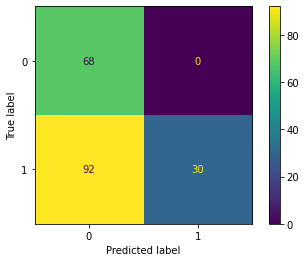

In [10]:
y_linreg_pred = linreg.predict(X_test)
y_linreg_pred = [int(num) for num in y_linreg_pred]
c_m_linreg = confusion_matrix(y_test, y_linreg_pred)
correct_linreg = c_m_linreg[0, 0] + c_m_linreg[1, 1]
incorrect_linreg = c_m_linreg[0, 1] + c_m_linreg[1, 0]
print(f'Correctly marked masses: {correct_linreg}')
print(f'Incorrectly marked masses: {incorrect_linreg}')
print(f'RMSE: {np.round(mean_squared_error(y_test, y_linreg_pred, squared=False), decimals=3)}')
print(f'Mean accuracy: {linreg.score(X,y)}')
disp = ConfusionMatrixDisplay(confusion_matrix = c_m_linreg)
disp.plot();

Let's take a second to evaluate what we're looking at here. Since this is a model generally used for regression, I have added RMSE in the calculations. First, the RMSE itself is pretty poor, generally the closer the RMSE is to 0 the better the classifier is, because it means the predicted line isn't far off from the data points. But this isn't really the story here. According to the confusion matrix, on our test set it predicted only half correctly. But even MORE importantly, it incorrectly marekd 92 masses, and those incorrected masses were all actually malignant but predicted as benign. I cannot stress how big of a problem that is. This is essentially completely useless, only correctly predicting masses 75 out of 100 times is not enough for a problem that needs as much care as possible. Let's see if logistic regression fairs any better.

### Logistic Regression

Correctly marked masses: 184
Incorrectly marked masses: 6
RMSE: 0.178
Mean accuracy: 0.9630931458699473


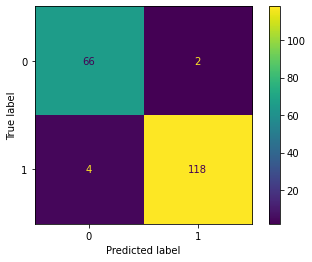

In [11]:
y_logreg_pred = logreg.predict(X_test)
c_m_logreg = confusion_matrix(y_test, y_logreg_pred)
correct_logreg = c_m_logreg[0, 0] + c_m_logreg[1, 1]
incorrect_logreg = c_m_logreg[0, 1] + c_m_logreg[1, 0]
print(f'Correctly marked masses: {correct_logreg}')
print(f'Incorrectly marked masses: {incorrect_logreg}')
print(f'RMSE: {np.round(mean_squared_error(y_test, y_logreg_pred, squared=False), decimals=3)}')
print(f'Mean accuracy: {logreg.score(X,y)}')
disp = ConfusionMatrixDisplay(confusion_matrix = c_m_logreg)
disp.plot();

This is MUCH better than what we saw with multivariate regression, this is much more along the lines of what we wwould hope to see. A mean accuracy of 96 times out of 100 is fantastic, and when comparing the prediction set with the test set, only getting 6 incorrect overall is pretty incredible. This can be considered a good algorithm to use for this dataset.

## Decision Tree

Let's first look at the tree itself, since Decision Trees allow us to take peek inside the algorithm.

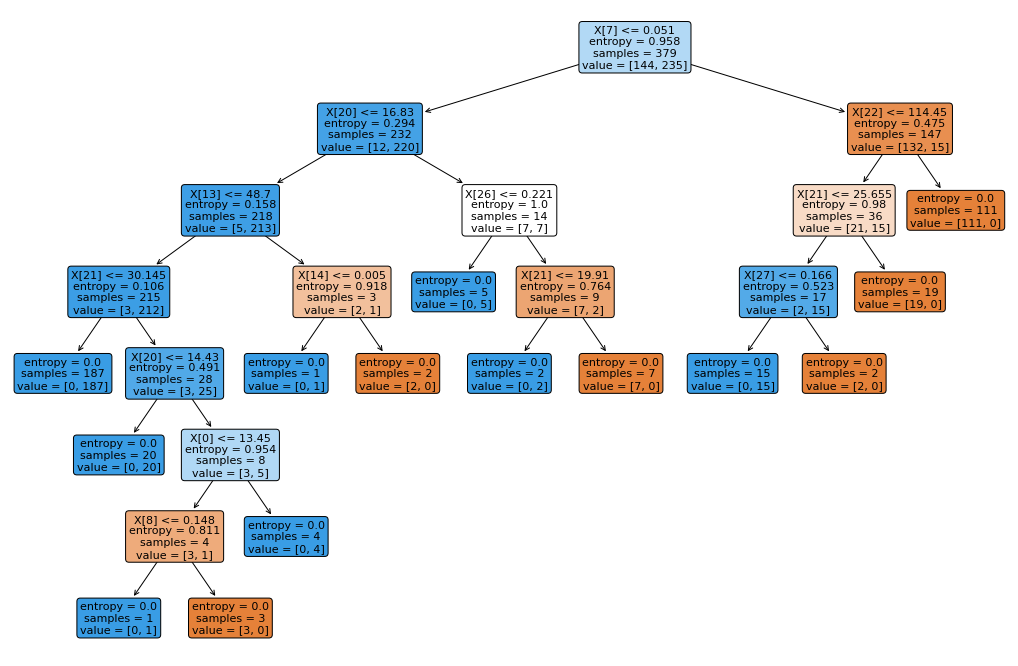

In [12]:
plt.figure(figsize=(18,12))
plot_tree(tree_class, filled=True, rounded=True);

Correctly marked masses: 180
Incorrectly marked masses: 10
RMSE: 0.229
Mean accuracy: 0.9824253075571178


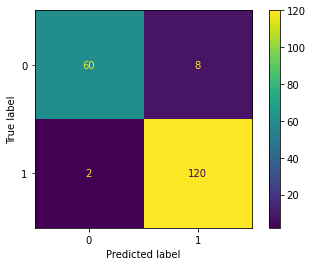

In [13]:
y_tree_pred = tree_class.predict(X_test)
c_m_tree = confusion_matrix(y_test, y_tree_pred)
correct_tree = c_m_tree[0, 0] + c_m_tree[1, 1]
incorrect_tree = c_m_tree[0, 1] + c_m_tree[1, 0]
print(f'Correctly marked masses: {correct_tree}')
print(f'Incorrectly marked masses: {incorrect_tree}')
print(f'RMSE: {np.round(mean_squared_error(y_test, y_tree_pred, squared=False), decimals=3)}')
print(f'Mean accuracy: {tree_class.score(X,y)}')
disp = ConfusionMatrixDisplay(confusion_matrix = c_m_tree)
disp.plot();

This algorithm did a fantastic job for this dataset. The RMSE is low, from the prediction set to the test set it only misclassified 10 out of 190, which is only around 5% incorrect. Even better, the Mean accuracy is roughly 98 times out of 100 correctly identified masses, which is absolutely outstanding. This can definitely be considered a good algorithm for this dataset.

# Conclusions / Observations

### Multivariate Regression vs Logistic Regression

Now is the time I want to answer the question you've been asking this whole time "Why are you running multivariate linear regression on a classification dataset?". If you didn't already know, this is a classification dataset, and NOT a regression dataset. I wanted to run multivariate linear regression on this dataset for that exact reason, to demonstrate the fact that the dataset is a classification dataset and how running regression on it differs from classification. For linear regression, the predicted values are floating point numbers because it's trying to get an exact number instead of classifying the data into a bucket, so I had to round the values, which inevitably caused some problems with the accuracy. This led to the linear regression performing pretty poorly for this dataset, but that's the point, it's not designed for this type of data. On the other hand, Logistic Regression is a linear classifier used for classification (although it can also be used for regression, but it's mainly used for classification), and thus works very well with this data. I wanted to do this to show it's just as important to understand what type of data you are working with as it is knowing how to apply ML algorithms to data.

### Logistic Regression vs Decision Tree

These two algoirthms both did a pretty amazing job at predicting whether a mass is malignant or benign. The really interesting to first compare, is both algoirthms had the same RMSE value. Even more interestingly, is that for the prediction dataset, the logistic regression algorithm was able to correctly identify 184 out of the 190 possible samples, while the decision tree correctly identified slightly less at 180 out of 190. The first thing we can take notice of when deciding a "winner" however, is that logistic regression had a small hiccup comapred to the decision tree when comparing the incorrectly labeled samples. More of the misses for logistic regression occur as a false negative than a false positive, meaning more malignant tumors are marked as benign than vice versa, which is somewhat of a problem. A false positive is initially scarier, but a false negative can be much more damaging if not caught early. This gives 1 point to the decision tree because I think even though more are identified as incorrect, they are false positives which isn't as big of a worry. The last observation is that the mean accuracy is higher for the decision tree. For logistic regression we see a mean accuracy of .96, while with decision trees, we see a mean accuracy of .98. This .2 difference may not seem like much, but in something as important as identifying malingant cancer masses, that can be the difference between saving someone's life. Overall, if I had to make a decision, I would recommend applying decision trees to this dataset.